In [1]:
# installing kaggle library

!pip install kaggle

In [4]:
# configuring the path of Kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Dog vs Cat dataset from kaggle

In [5]:
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:09<00:00, 82.4MB/s]
100% 812M/812M [00:09<00:00, 86.2MB/s]


In [6]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [7]:
# extracting the compressed file

from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()

print('The dataset is extracted')

The dataset is extracted


In [8]:
# extracting the compressed file

from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()

print('The dataset is extracted')

The dataset is extracted


In [10]:
import os

# counting the number of files in train folder

path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)

print(file_count)

25000


Printing the name of images

In [11]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.2223.jpg', 'dog.9298.jpg', 'dog.6008.jpg', 'dog.11932.jpg', 'cat.3632.jpg', 'dog.10182.jpg', 'dog.8492.jpg', 'cat.4290.jpg', 'cat.8431.jpg', 'dog.10457.jpg', 'dog.4982.jpg', 'dog.481.jpg', 'cat.6821.jpg', 'cat.7198.jpg', 'cat.6905.jpg', 'dog.3750.jpg', 'cat.10508.jpg', 'dog.12228.jpg', 'dog.8427.jpg', 'cat.10998.jpg', 'dog.3951.jpg', 'cat.6591.jpg', 'dog.11549.jpg', 'cat.11316.jpg', 'dog.3986.jpg', 'cat.6417.jpg', 'cat.6051.jpg', 'cat.1701.jpg', 'dog.5201.jpg', 'cat.11630.jpg', 'dog.561.jpg', 'cat.4426.jpg', 'dog.2384.jpg', 'dog.2688.jpg', 'dog.10382.jpg', 'dog.4462.jpg', 'cat.1623.jpg', 'cat.9617.jpg', 'cat.9697.jpg', 'cat.6978.jpg', 'cat.12170.jpg', 'dog.1637.jpg', 'cat.11966.jpg', 'cat.454.jpg', 'cat.9813.jpg', 'cat.246.jpg', 'cat.8293.jpg', 'dog.12370.jpg', 'dog.5238.jpg', 'dog.9940.jpg', 'cat.5293.jpg', 'cat.5491.jpg', 'dog.1617.jpg', 'cat.68.jpg', 'dog.103.jpg', 'dog.10997.jpg', 'dog.11795.jpg', 'dog.8881.jpg', 'cat.9746.jpg', 'cat.3410.jpg', 'cat.12438.jpg', 'cat.4157.jpg'

Importing the dependencies

In [ ]:
!pip install google.colab

In [18]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying images

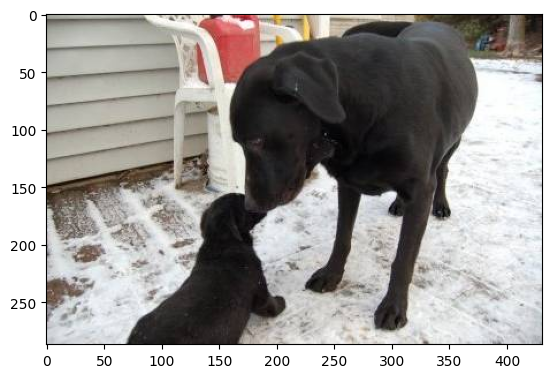

In [22]:
img = mpimg.imread('/content/train/dog.3951.jpg')
imgplt = plt.imshow(img)
plt.show()

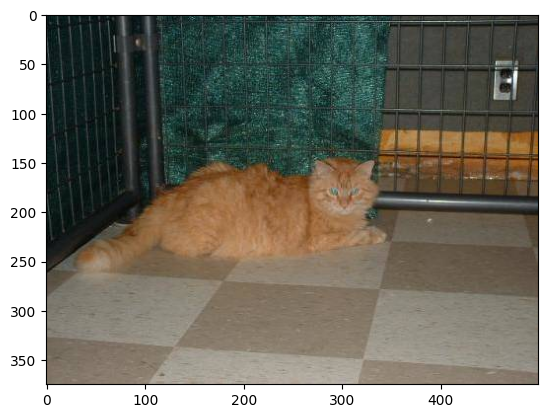

In [23]:
img = mpimg.imread('/content/train/cat.10998.jpg')
imgplt = plt.imshow(img)
plt.show()

In [26]:
# finding the number of cat and dog images

file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [27]:
# to get a copy of an image and resized image

# creating a directory of these resized images

os.mkdir('/content/image resized')

In [28]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'


# to take just 2000 first pictures

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename # /content/train/+cat.10998.jpg

  # open the image and resize it
  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [30]:
# finding the number of cat and dog images

file_names = os.listdir('/content/image resized/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 987
Number of cat images = 1013


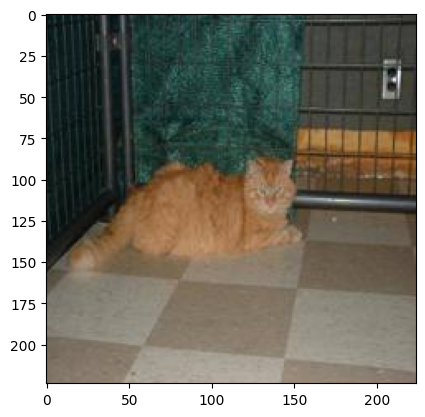

In [32]:
# display resized image

img = mpimg.imread('/content/image resized/cat.10998.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images

cat -> 0
dog -> 1

In [34]:
# creating a for loop to assign labels to the images

filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [36]:
print(filenames[0:5])
print(labels[0:5])
print(len(filenames))

['dog.2223.jpg', 'dog.9298.jpg', 'dog.6008.jpg', 'dog.11932.jpg', 'cat.3632.jpg']
[1, 1, 1, 1, 0]
2000


In [39]:
# finding the count of dogs and cats in a different way

values, counts = np.unique(labels, return_counts=True)

In [40]:
print(values)
print(counts)

[0 1]
[1013  987]


Converting to numpy arrays

In [41]:
import cv2
import glob

In [46]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

# locate the file considering both jpg and png format, append it to files]
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

# take every individual image (as a numpy array) and convert it to one numpy array
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [47]:
print(dog_cat_images)

[[[[123 122 124]
   [124 123 125]
   [125 124 126]
   ...
   [105 113 113]
   [113 119 118]
   [135 141 140]]

  [[127 126 128]
   [118 117 119]
   [117 116 118]
   ...
   [116 124 124]
   [125 131 130]
   [140 146 145]]

  [[118 117 119]
   [113 112 114]
   [120 119 121]
   ...
   [116 124 124]
   [123 129 128]
   [128 134 133]]

  ...

  [[180 188 205]
   [185 193 210]
   [187 195 212]
   ...
   [187 198 206]
   [185 196 204]
   [182 193 201]]

  [[183 191 208]
   [186 194 211]
   [186 194 211]
   ...
   [188 199 207]
   [186 197 205]
   [185 196 204]]

  [[187 195 212]
   [189 197 214]
   [187 195 212]
   ...
   [189 200 208]
   [188 199 207]
   [188 199 207]]]


 [[[ 59  84 104]
   [ 58  83 103]
   [ 57  82 102]
   ...
   [ 69  84 103]
   [ 67  82 101]
   [101 116 135]]

  [[ 47  72  92]
   [ 46  71  91]
   [ 45  70  90]
   ...
   [ 60  75  94]
   [ 59  74  93]
   [ 92 107 126]]

  [[ 45  70  90]
   [ 44  69  89]
   [ 43  68  88]
   ...
   [ 59  74  93]
   [ 59  74  93]
   [ 93 108

In [49]:
type(dog_cat_images)

numpy.ndarray

In [50]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [52]:
X = dog_cat_images
Y = np.asarray(labels)

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [56]:
# scaling the data (rgb values range from 0 to 255)

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [57]:
print(X_train_scaled)

[[[[0.48235294 0.47843137 0.48627451]
   [0.48627451 0.48235294 0.49019608]
   [0.49019608 0.48627451 0.49411765]
   ...
   [0.41176471 0.44313725 0.44313725]
   [0.44313725 0.46666667 0.4627451 ]
   [0.52941176 0.55294118 0.54901961]]

  [[0.49803922 0.49411765 0.50196078]
   [0.4627451  0.45882353 0.46666667]
   [0.45882353 0.45490196 0.4627451 ]
   ...
   [0.45490196 0.48627451 0.48627451]
   [0.49019608 0.51372549 0.50980392]
   [0.54901961 0.57254902 0.56862745]]

  [[0.4627451  0.45882353 0.46666667]
   [0.44313725 0.43921569 0.44705882]
   [0.47058824 0.46666667 0.4745098 ]
   ...
   [0.45490196 0.48627451 0.48627451]
   [0.48235294 0.50588235 0.50196078]
   [0.50196078 0.5254902  0.52156863]]

  ...

  [[0.70588235 0.7372549  0.80392157]
   [0.7254902  0.75686275 0.82352941]
   [0.73333333 0.76470588 0.83137255]
   ...
   [0.73333333 0.77647059 0.80784314]
   [0.7254902  0.76862745 0.8       ]
   [0.71372549 0.75686275 0.78823529]]

  [[0.71764706 0.74901961 0.81568627]
   [0.7

Building the Neural Network

In [58]:
import tensorflow as tf
import tensorflow_hub as hub

In [59]:
mobilenet_model = 'https://www.kaggle.com/models/google/mobilenet-v2/frameworks/tensorFlow2/variations/tf2-preview-feature-vector/versions/4?tfhub-redirect=true'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [61]:
num_of_classes = 2

model = tf.keras.Sequential(
    [
      pretrained_model,
      tf.keras.layers.Dense(num_of_classes)
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [63]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [66]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 85s 2s/step - loss: 0.1443 - acc: 0.9481
Epoch 2/5
50/50 [==============================] - 79s 2s/step - loss: 0.0596 - acc: 0.9819
Epoch 3/5
50/50 [==============================] - 76s 1s/step - loss: 0.0439 - acc: 0.9862
Epoch 4/5
50/50 [==============================] - 81s 2s/step - loss: 0.0343 - acc: 0.9894
Epoch 5/5
50/50 [==============================] - 93s 2s/step - loss: 0.0289 - acc: 0.9931


In [67]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 21s 1s/step - loss: 0.0673 - acc: 0.9675
Test Loss = 0.06731965392827988
Test Accuracy = 0.9674999713897705


Predictive System

Path of the image to be predicted: /content/tiger.jpg


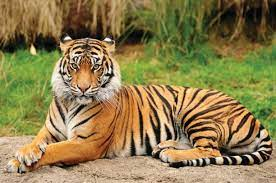

1/1 [==============================] - 0s 102ms/step
The image represents a cat


In [70]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
# to tell the model that im making prediction for only one image (as opposed to [2000, 224, 224, 3])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print("The image represents a cat")
else:
  print("The image represents a dog")